In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

In [2]:
train_data = pd.read_csv('C:/Users/frane/kaggleproject/Data/preprocessed2-train-bank-data.csv', sep=';')
test_data = pd.read_csv('C:/Users/frane/kaggleproject/Data/preprocessed2-test-bank-data.csv', sep=';')

train_data.head()

,age,campaign,contacted.in.previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,...,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,month_sin,month_cos,day_sin,day_cos,y
0,0.322632,1.000000,0.0,1.000000,0.612813,0.390735,0.970664,1.000000,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,-0.500000,-0.866025,-5.877853e-01,-0.809017,0.0
1,0.552137,0.000000,0.0,1.000000,0.422695,0.724448,0.970664,1.000000,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,-0.866025,-0.500000,-9.510565e-01,0.309017,0.0
2,0.636314,0.495659,0.0,0.854914,0.644951,0.710269,0.932652,0.710922,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.500000,-0.866025,-2.449294e-16,1.000000,0.0
3,0.798640,0.000000,0.0,0.432174,0.331438,0.428275,0.714556,0.743803,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,-0.500000,0.866025,9.510565e-01,0.309017,0.0
4,0.552137,0.495659,0.0,1.000000,0.612813,0.390735,0.970309,1.000000,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,-0.500000,-0.866025,-9.510565e-01,0.309017,0.0


In [3]:
X_train, y_train = train_data.drop('y', axis=1), train_data['y']
X_test, y_test = test_data.drop('y', axis=1), test_data['y']

# Building Multi-layer Perceptron Classifier model

In [4]:
mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)

c:\Users\frane\anaconda3\envs\kaggleproject\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

In [5]:
print(f"Metrics of model working on unseen data:\
      \n{classification_report(y_test, mlpc.predict(X_test))}")

print(f"Metrics of model working on seen data:\
      \n{classification_report(y_train, mlpc.predict(X_train))}")

Metrics of model working on unseen data:      
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      7105
         1.0       0.52      0.33      0.41       870

    accuracy                           0.89      7975
   macro avg       0.72      0.65      0.67      7975
weighted avg       0.88      0.89      0.88      7975

Metrics of model working on seen data:      
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96     28211
         1.0       0.73      0.45      0.56      3617

    accuracy                           0.92     31828
   macro avg       0.83      0.71      0.76     31828
weighted avg       0.91      0.92      0.91     31828



Model is overfitted

In [6]:
mlpc = MLPClassifier(max_iter=10)
mlpc.fit(X_train, y_train)

print(f"Metrics of model working on unseen data:\
      \n{classification_report(y_test, mlpc.predict(X_test))}")

print(f"Metrics of model working on seen data:\
      \n{classification_report(y_train, mlpc.predict(X_train))}")

Metrics of model working on unseen data:      
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      7105
         1.0       0.63      0.27      0.38       870

    accuracy                           0.90      7975
   macro avg       0.78      0.62      0.66      7975
weighted avg       0.89      0.90      0.89      7975

Metrics of model working on seen data:      
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95     28211
         1.0       0.66      0.27      0.39      3617

    accuracy                           0.90     31828
   macro avg       0.79      0.63      0.67     31828
weighted avg       0.88      0.90      0.88     31828



c:\Users\frane\anaconda3\envs\kaggleproject\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


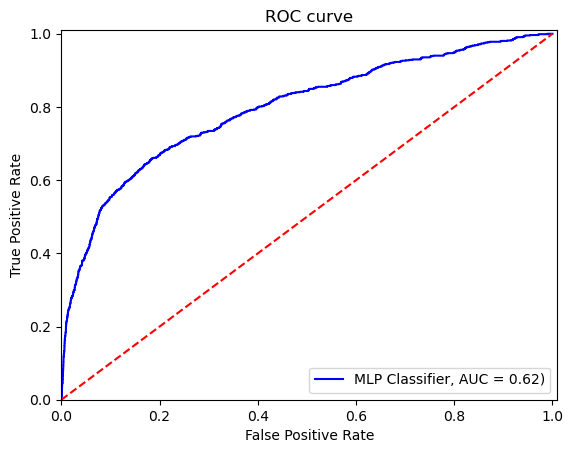

In [7]:
roc_auc = roc_auc_score(y_test, mlpc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, mlpc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label=f'MLP Classifier, AUC = {round(roc_auc, 2)})', color='b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

After reducing 'max_iter' model is no longer overfitted and has similar metrics to the first Logistic Regression model